# Investigating the data
Devin de Araujo<br>
25.03.2018

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

% matplotlib inline
% config figure.format_InlineBackend = 'retina'

sns.set(style='white')

In [48]:
df_master = pd.read_csv('twitter_archive_master.csv')

df_pred = pd.read_csv('image_predictions_clean.csv')

## Additional cleaning

- The scope of the cleaning was too large to cover everything in the wrangle_act notebook. I left out any rating cleaning, however. After producing the below plots, I noticed that there are erroneous values in the rating columns. eg:

In [49]:
df_master.rating_denominator.value_counts()

10     2080
50        3
11        2
80        2
7         1
170       1
150       1
120       1
110       1
90        1
70        1
40        1
20        1
2         1
Name: rating_denominator, dtype: int64

The same applies to the numerator

In [50]:
df_master.rating_numerator.value_counts()

12      472
10      437
11      417
13      287
9       153
8       101
7        52
14       41
5        35
6        32
3        19
4        16
2         9
1         5
75        2
26        1
44        1
165       1
24        1
60        1
50        1
144       1
80        1
84        1
88        1
121       1
204       1
420       1
1776      1
15        1
27        1
45        1
99        1
0         1
Name: rating_numerator, dtype: int64

I will quickly clean these by removing the records. If I had more time, I would investigate them properly to assert if they are user error, ie 170 instead of 17.

In [51]:
df_master = df_master.query('rating_denominator == 10 & rating_numerator <= 15')

### Add favorite and retweet info to image predictions

In [52]:
# merge the data frames

df_pred = pd.merge(df_pred, df_master, on = 'tweet_id', how = 'left')

# drop unwanted columns

df_pred = df_pred.drop(['timestamp', 'text', 'url', 'expanded_urls'], axis = 1)

df_pred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1216 entries, 0 to 1215
Data columns (total 19 columns):
tweet_id              1216 non-null int64
jpg_url               1216 non-null object
img_num               1216 non-null int64
p1                    1216 non-null object
p1_conf               1216 non-null float64
p1_dog                1216 non-null bool
p2                    1216 non-null object
p2_conf               1216 non-null float64
p2_dog                1216 non-null bool
p3                    1216 non-null object
p3_conf               1216 non-null float64
p3_dog                1216 non-null bool
rating_numerator      1088 non-null float64
rating_denominator    1088 non-null float64
name                  801 non-null object
type                  174 non-null object
source                1086 non-null object
favorite_count        1086 non-null float64
retweet_count         1086 non-null float64
dtypes: bool(3), float64(7), int64(2), object(7)
memory usage: 165.1+ KB


### Most popular category?
- Doggo, Pupper, Floofer or Puppo

** Motivation**

To assert which dog 'type' is the most popular.

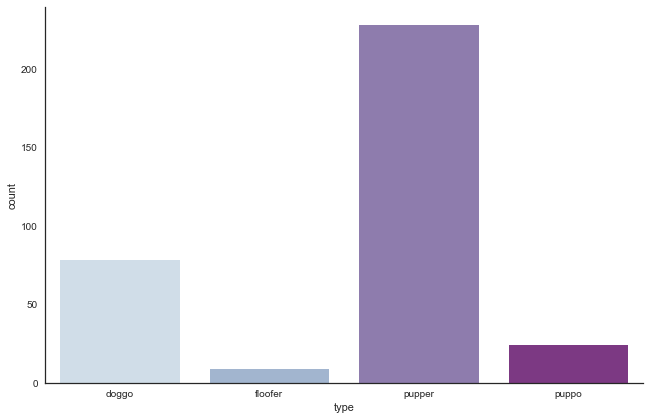

In [53]:
p1 = sns.factorplot(data=df_master, x='type', kind='count',
                   palette='BuPu', size=6, aspect=1.5)

I find it interesting that 'pupper' is the most popular classification. Until this analysis was performed, I would have guessed 'doggo', based on the popular use among my peers.

## Most popular times to tweet about doggos
**Motivation**

Is there a particular time of year where dog tweets are more popular? I would like to compare this by Month and Day of the Week. Some additional data will need to be extracted to make analysis easier. 

Extract Month, Day, Year information from the **timestamp** column

In [54]:
df_master.timestamp = pd.to_datetime(df_master.timestamp, format='%Y/%m/%d %H:%M:%S')

df_master['month'] = df_master.timestamp.dt.month
df_master['year'] = df_master.timestamp.dt.year
df_master['day'] = df_master.timestamp.dt.weekday

df_master.head(2)

,tweet_id,timestamp,text,url,expanded_urls,rating_numerator,rating_denominator,name,type,source,favorite_count,retweet_count,month,year,day
0,890240255349198849,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying...,https://t.co/t1bfwz5S2A,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,Twitter for iPhone,32117.0,7539.0,7,2017,2
1,757393109802180609,2016-07-25 01:52:43,Here's a doggo completely oblivious to the dou...,https://t.co/OfvRoD6ndV,https://twitter.com/dog_rates/status/757393109...,10,10,NaN,doggo,Twitter for iPhone,6348.0,1958.0,7,2016,0


### Most popular Month of the Year

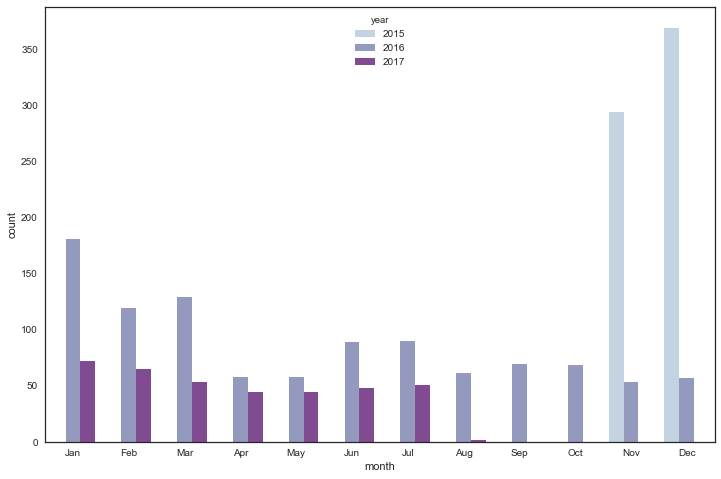

In [55]:
# plot the data

fig = plt.figure(figsize=(12,8))

p2 = sns.countplot(data = df_master, x = "month", hue = "year", palette = 'BuPu')
p2.set(xticklabels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']);

In [56]:
df_master.query('year == 2015')['month'].value_counts()

12    369
11    294
Name: month, dtype: int64

Generally speaking, January and February appear to be the most popular times to tweet about dogs. November and December also appear very very popular but there is incomplete data for 2015. There is no tweet information for earlier in the year so it is hard to make any accurate comparisons. I would assert that December through to January would be a popular time because this is right around Christmas where a lot of families would most likely get pets for children. It would be interesting to get location information about the tweets to be able to look at this data in different regions, mainly to see if there is any seasonal affect on the popularity. 

### Most Popular Day of the Week

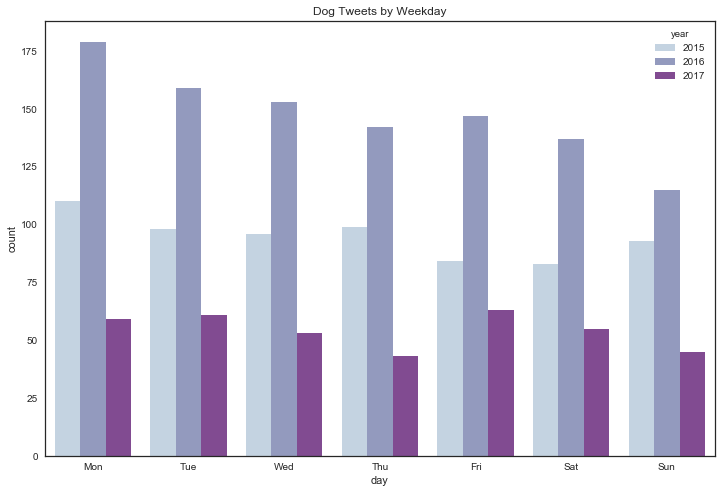

In [60]:
# Most Popular Day of the week

fig = plt.figure(figsize =(12,8))

p3 = sns.countplot(data = df_master, x = 'day', palette = 'BuPu', hue = 'year')
p3.set(xticklabels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], title = 'Dog Tweets by Weekday');

In 2015 and 2016, **Monday** was the most popular day to tweet about dogs. This is somewhat surprising, I would have thought that the weekend would have more activity. One assumption could be because people need something to lift their spirits on the first day of the working week. This could be explored further by checking the time of day that tweets were made at.

### Most popular Time of Day

In [58]:
df_master['time'] = df_master['timestamp'].dt.hour

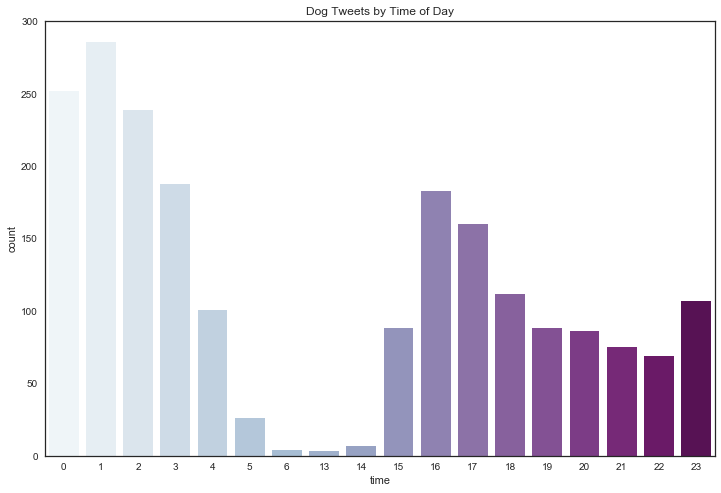

In [59]:
# Most Popular Time of Day

fig = plt.figure(figsize =(12,8))

p3a = sns.countplot(data = df_master, x = 'time', palette = 'BuPu')
p3a.set(title = 'Dog Tweets by Time of Day');

It is very surprising to see the majority of doggo tweets being posted at **1am**. The numbers drop off rapidly from 4am with no activity between 7am and 1pm. Lunch time is slow but ativity ramps up around 3pm, when the workday starts to slow down and most likely, motivation drops off.

## Is there a relationship between favourites and retweets?

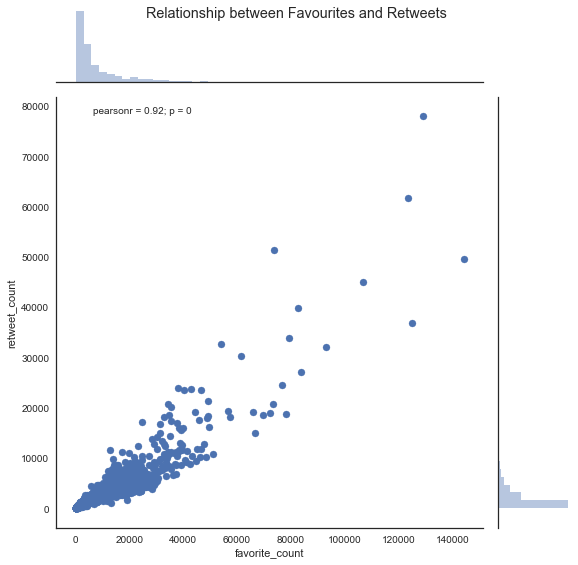

In [64]:
fav_data = df_master.query('favorite_count > 10')

p5 = sns.jointplot(data = fav_data, x = 'favorite_count' , y='retweet_count', kind='scatter', size=8);
p5.fig.suptitle('Relationship between Favourites and Retweets');

A correlation on 0.92 indicates that there is a strong, positive relationship between the two variables. Lets plot this with the log of the two variables alon with a correlation test. 

### Log transforming favorite and retweet counts

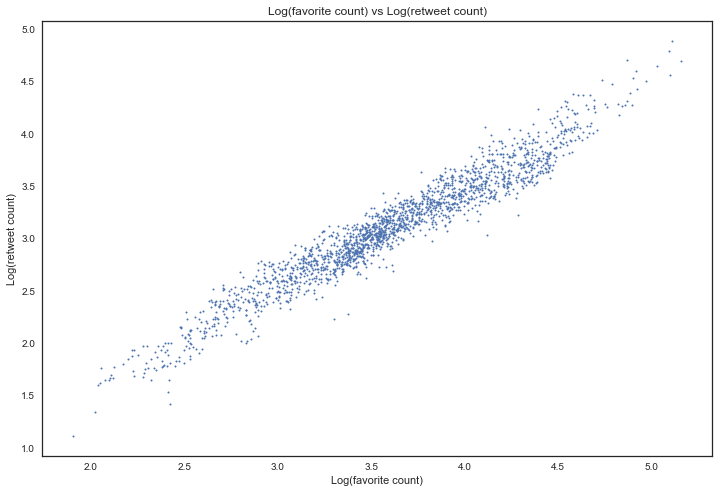

Correlation coefficient:  0.966531945307


In [63]:
# transform x and y from fav_data
x_log = np.log10(fav_data.favorite_count)
y_log = np.log10(fav_data.retweet_count)

# build plot
plt.figure(1, figsize = (12,8))
plt.plot(x_log, y_log, marker='o', linestyle='', ms=2)
plt.xlabel('Log(favorite count)')
plt.ylabel('Log(retweet count)')
plt.title('Log(favorite count) vs Log(retweet count)')
plt.show()

print('Correlation coefficient: ',np.corrcoef(x_log, y_log)[0][1])

The above plot maximises the relationship between the two variables. It isn't surprising that tweets with a high favorite count also have a high retweet count, if people like the post, they are more likely to share it, hence the relationship between the two is so strong.

## Image Predictions

For this section of the analysis I will investigate the image predictions data to see which breed is the most liked

- Most popular breeds (top 20) based on favourite counts
    - some additional cleaning may be necessary

In [65]:
df_pred.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,rating_numerator,rating_denominator,name,type,source,favorite_count,retweet_count
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Welsh Springer Spaniel,0.156665,True,Welsh Springer Spaniel,0.061428,True,8.0,10.0,NaN,NaN,Twitter for iPhone,2521.0,519.0
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Redbone,0.074192,True,Redbone,0.072010,True,7.0,10.0,a,NaN,Twitter for iPhone,131.0,47.0
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,German Shepherd,0.138584,True,German Shepherd,0.116197,True,9.0,10.0,a,NaN,Twitter for iPhone,125.0,45.0
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,Rhodesian Ridgeback,0.360687,True,Rhodesian Ridgeback,0.222752,True,6.0,10.0,a,NaN,Twitter for iPhone,302.0,141.0
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Miniature Pinscher,0.243682,True,Miniature Pinscher,0.154629,True,5.0,10.0,NaN,NaN,Twitter for iPhone,109.0,40.0


## Top 20 Breeds based on Favorite Count

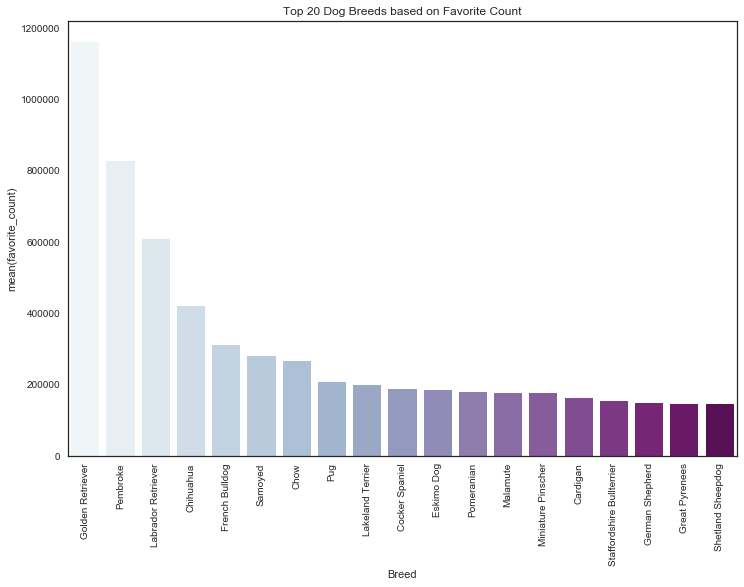

In [66]:
img_data = df_pred.groupby('p1')['favorite_count'].sum().sort_values(ascending=False)[0:19]

labs = img_data.index.tolist()
values = img_data.values.tolist()

fig = plt.figure(figsize = (12,8))

p3 = sns.barplot(data = img_data, x = values, y = labs, palette = 'BuPu', order=values)
p3.set_xticklabels(labs, rotation=90)
plt.title('Top 20 Dog Breeds based on Favorite Count')
plt.xlabel('Breed');

### Does this match the ratings?
- create a rating column and convert to %
- since the rating uses imporper fractions, the % will be greater than 100%

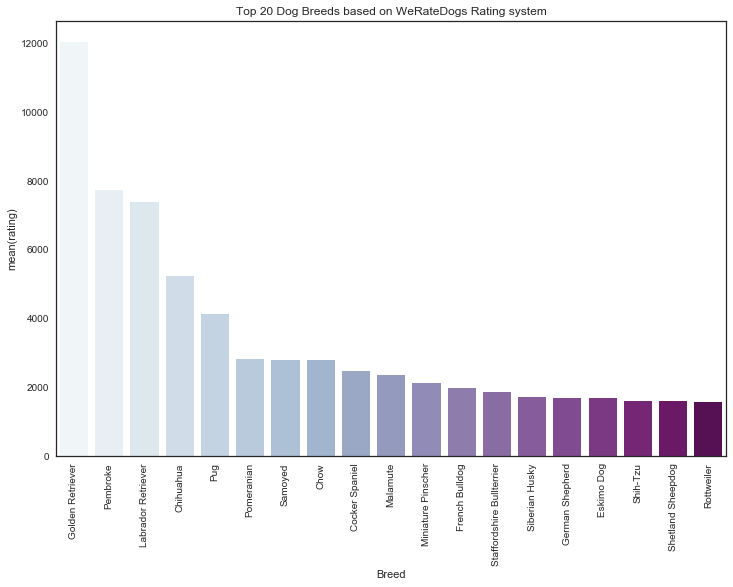

In [67]:
# Create a rating % column
df_pred['rating'] = (df_pred['rating_numerator'] / df_pred['rating_denominator']) * 100

rating_data = df_pred.groupby('p1')['rating'].sum().sort_values(ascending=False)[0:19]


labs = rating_data.index.tolist()
values = rating_data.values.tolist()

fig = plt.figure(figsize = (12,8))

p4 = sns.barplot(data = rating_data, x = values, y = labs, palette = 'BuPu', order=values)
p4.set_xticklabels(labs, rotation=90)
plt.title('Top 20 Dog Breeds based on WeRateDogs Rating system')
plt.xlabel('Breed');

The **Golden Retriever** is definitely the most popular breed in the data set. The top 4 breeds match but from there on differ. Users favoured the French Bulldog followed by the Semoyed, but WeRateDogs picks the Pug and Pomeranian for spots 5 and 6. 

# Conclusion

This is a very interesting set of data. Had I more time, I would have loved to look at the rating information in more detail. Given that the rating denominator had values below 10, I would assume that at some stage rating were not always given in the 13/10 format, with the numerator being higher than the denominator. It would be interesting to identify if there was a period in time where this shift occurred, or if this was due to error, or simply due to variance in the rating method. 

Another thing I would love to do is gather geo or location data from the twitter api and look at the data for different regions. The categorical names like 'doggo' and 'puppo' made me wonder if these are region specific. 

Overall, I think the quality of the data has been greatly improved, allowing the user to investigate easily and search for interesting insights.